# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i ==0:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(x)
        
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [9]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() #清除舊的Graph
    print('Experiment with LR = {:.6f}'.format(lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    
    model.fit(x_train, y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test),
              shuffle=True)
    
    #Collect results
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']
    
    exp_name_tag = 'exp-lr-{}'.format(str(lr))
    results[exp_name_tag] = {'train-loss' : train_loss,
                             'valid-loss' : valid_loss,
                             'train-acc' : train_acc,
                             'valid-acc' : valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Epoch 49/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.3896 - accuracy: 0.5131 - val_loss: 1.6697 - val_accuracy: 0.4361
Epoch 50/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.4086 - accuracy: 0.5083 - val_loss: 1.7211 - val_accuracy: 0.4277
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_____________________________________________________________

Epoch 47/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.3977 - accuracy: 0.8572 - val_loss: 2.1505 - val_accuracy: 0.5238
Epoch 48/50
50000/50000 [==============================] - 6s 114us/step - loss: 0.3997 - accuracy: 0.8559 - val_loss: 2.1907 - val_accuracy: 0.5190
Epoch 49/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.3829 - accuracy: 0.8619 - val_loss: 2.2607 - val_accuracy: 0.5187
Epoch 50/50
50000/50000 [==============================] - 6s 114us/step - loss: 0.3765 - accuracy: 0.8645 - val_loss: 2.2556 - val_accuracy: 0.5225
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___________________________

Epoch 45/50
50000/50000 [==============================] - 6s 114us/step - loss: 0.9360 - accuracy: 0.6687 - val_loss: 1.3688 - val_accuracy: 0.5338
Epoch 46/50
50000/50000 [==============================] - 6s 115us/step - loss: 0.9269 - accuracy: 0.6726 - val_loss: 1.3625 - val_accuracy: 0.5363
Epoch 47/50
50000/50000 [==============================] - 6s 120us/step - loss: 0.9130 - accuracy: 0.6763 - val_loss: 1.3953 - val_accuracy: 0.5346
Epoch 48/50
50000/50000 [==============================] - 6s 112us/step - loss: 0.9001 - accuracy: 0.6831 - val_loss: 1.3475 - val_accuracy: 0.5415
Epoch 49/50
50000/50000 [==============================] - 5s 105us/step - loss: 0.8934 - accuracy: 0.6858 - val_loss: 1.4662 - val_accuracy: 0.5158
Epoch 50/50
50000/50000 [==============================] - 5s 105us/step - loss: 0.8775 - accuracy: 0.6903 - val_loss: 1.4432 - val_accuracy: 0.5242
Experiment with LR = 0.000100
Model: "model_1"
___________________________________________________________

Epoch 43/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.5967 - accuracy: 0.4423 - val_loss: 1.6054 - val_accuracy: 0.4390
Epoch 44/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.5926 - accuracy: 0.4435 - val_loss: 1.6008 - val_accuracy: 0.4407
Epoch 45/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.5880 - accuracy: 0.4449 - val_loss: 1.5998 - val_accuracy: 0.4388
Epoch 46/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.5836 - accuracy: 0.4465 - val_loss: 1.5952 - val_accuracy: 0.4405
Epoch 47/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.5790 - accuracy: 0.4484 - val_loss: 1.5897 - val_accuracy: 0.4442
Epoch 48/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.5752 - accuracy: 0.4488 - val_loss: 1.5850 - val_accuracy: 0.4453
Epoch 49/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.5710 - accuracy: 0.4522

Epoch 41/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.9449 - accuracy: 0.3161 - val_loss: 1.9430 - val_accuracy: 0.3186
Epoch 42/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.9416 - accuracy: 0.3182 - val_loss: 1.9397 - val_accuracy: 0.3194
Epoch 43/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.9382 - accuracy: 0.3197 - val_loss: 1.9365 - val_accuracy: 0.3202
Epoch 44/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.9351 - accuracy: 0.3218 - val_loss: 1.9334 - val_accuracy: 0.3199
Epoch 45/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.9319 - accuracy: 0.3222 - val_loss: 1.9303 - val_accuracy: 0.3223
Epoch 46/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.9288 - accuracy: 0.3236 - val_loss: 1.9273 - val_accuracy: 0.3252
Epoch 47/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.9259 - accuracy: 0.3246

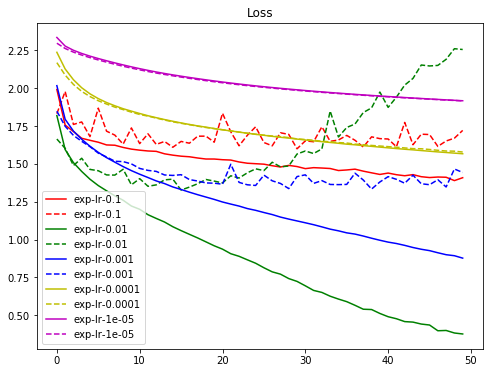

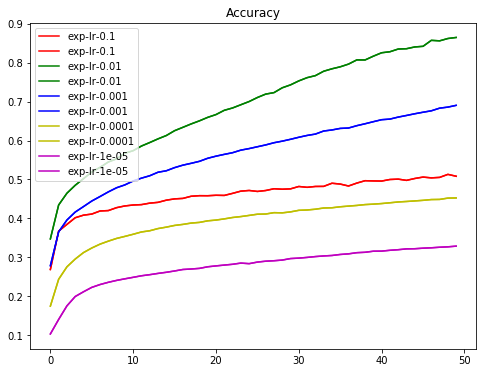

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ['r', 'g', 'b', 'y', 'm', 'k']

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
plt.title('Accuracy')
plt.legend()
plt.show()